## Analyzing the world's wealthiest people

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import random
import numpy as np

In [93]:
#dataframe 
df = pd.read_csv("Top_1000_wealthiest_people.csv")
df

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart
...,...,...,...,...,...
995,Warren Buffett,USA,Retail,142.66,Facebook
996,Amancio Ortega,USA,Media,166.87,Walmart
997,Alice Walton,USA,Retail,30.44,Walmart
998,Amancio Ortega,Spain,Retail,163.18,Reliance Industries


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1000 non-null   object 
 1   Country                  1000 non-null   object 
 2   Industry                 1000 non-null   object 
 3   Net Worth (in billions)  1000 non-null   float64
 4   Company                  1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [95]:
h = pd.DataFrame(random.choice(np.array(df)))


#### H(0) = There is no correlation between the net worth of a billionaire and industry
#### H(1) = There is a correlation between the net worth of a billionaire and industry

In [96]:
wp =  df.head(10)
len(wp)

10

In [97]:
def Anova(inpData, TargetVariable, CategoricalPredictorList):

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
  

In [98]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Industry']
Anova(inpData=wp, TargetVariable='Net Worth (in billions)', CategoricalPredictorList=CategoricalPredictorList)

Industry is correlated with Net Worth (in billions) | P-Value: 0.026973002445099082


##### Type 2 Error: Due to size of the sample (false negative)

# Solution

In [99]:
df2 = df.head(600)
df2

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart
...,...,...,...,...,...
595,Carlos Slim,Spain,Technology,138.05,Google
596,Larry Ellison,USA,Manufacturing,13.28,Walmart
597,Steve Ballmer,USA,Technology,59.66,Reliance Industries
598,Alice Walton,USA,Technology,92.98,Bloomberg LP


<Axes: xlabel='Industry', ylabel='Net Worth (in billions)'>

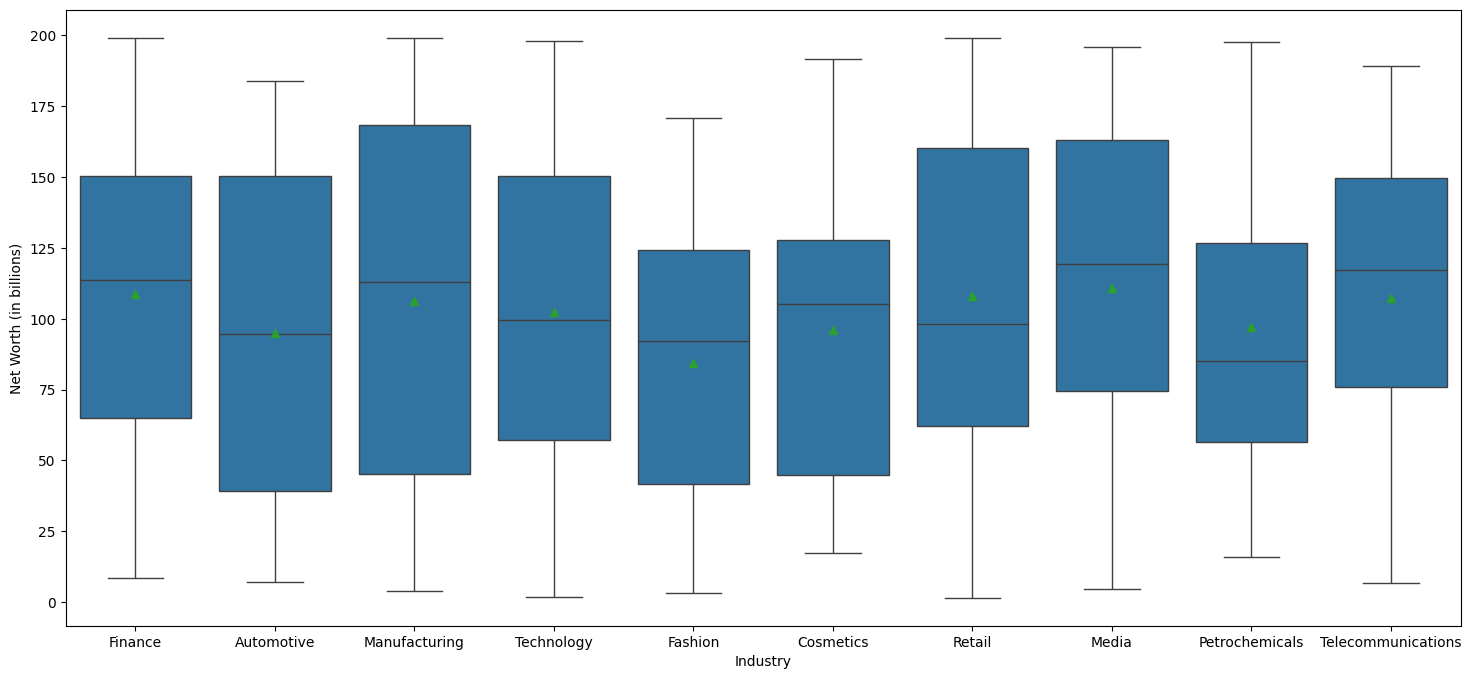

In [100]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df2, x='Industry', y = 'Net Worth (in billions)',showmeans=True)

In [101]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Industry']
Anova(inpData=df2, TargetVariable='Net Worth (in billions)', CategoricalPredictorList=CategoricalPredictorList)

Industry is NOT correlated with Net Worth (in billions) | P-Value: 0.6951337193818259
